In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx"
df = pd.read_excel(url, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,437,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# If unnamed columns are present
df.drop(columns=df.columns.values[-8:], inplace=True)

In [4]:
# to remove selected columns
df.drop(columns=['Type', 'Coverage', 'DEV', 'AREA', 'REG'], inplace=True)

In [5]:
df.rename(columns={ 'OdName' : 'Country', 'AreaName' : 'Continent' }, inplace=True)

In [6]:
df.set_index('Country', inplace=True)
# to reset index
# df.reset_index(inplace=True)

In [7]:
years = list(range(1980, 2014))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

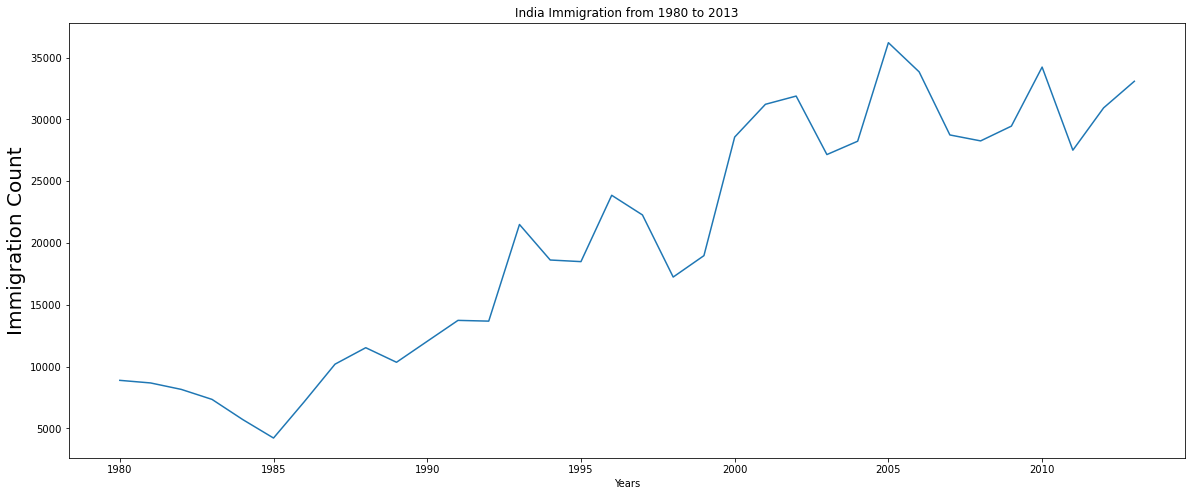

In [8]:
df.loc['India', years].plot( figsize=(20, 8) )
plt.title('India Immigration from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Immigration Count', size=20)
plt.show()

<AxesSubplot:>

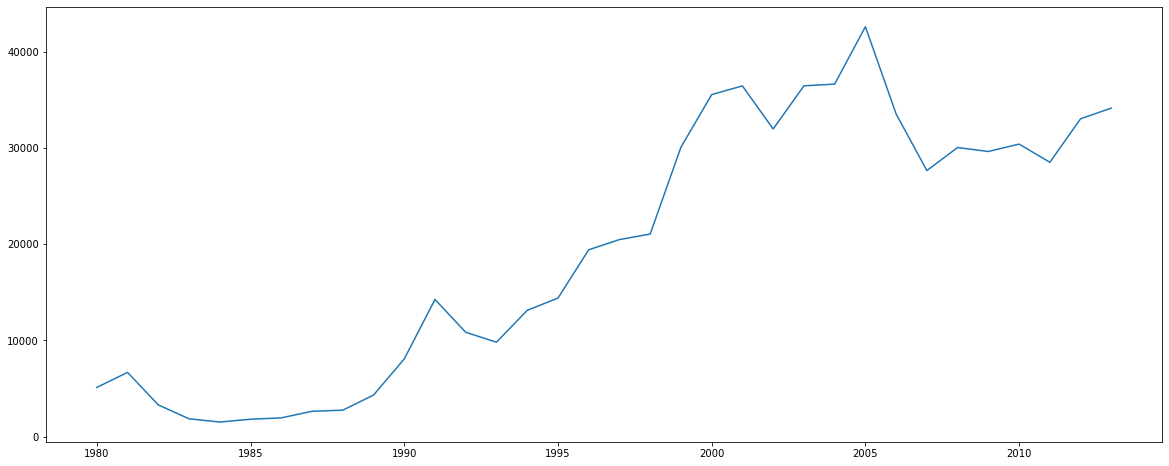

In [9]:
df.loc['China', years].plot( figsize=(20, 8) )

<AxesSubplot:>

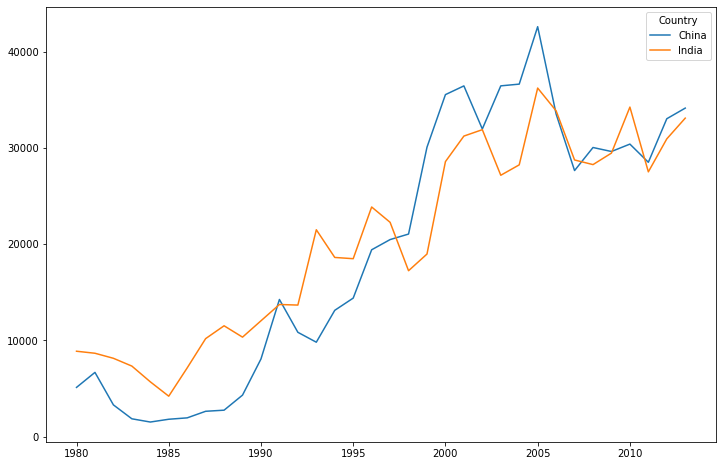

In [10]:
# transposing data
df.loc[['China', 'India'], years].T.plot(figsize=(12, 8))

In [11]:
df.loc['India', years]

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

<AxesSubplot:>

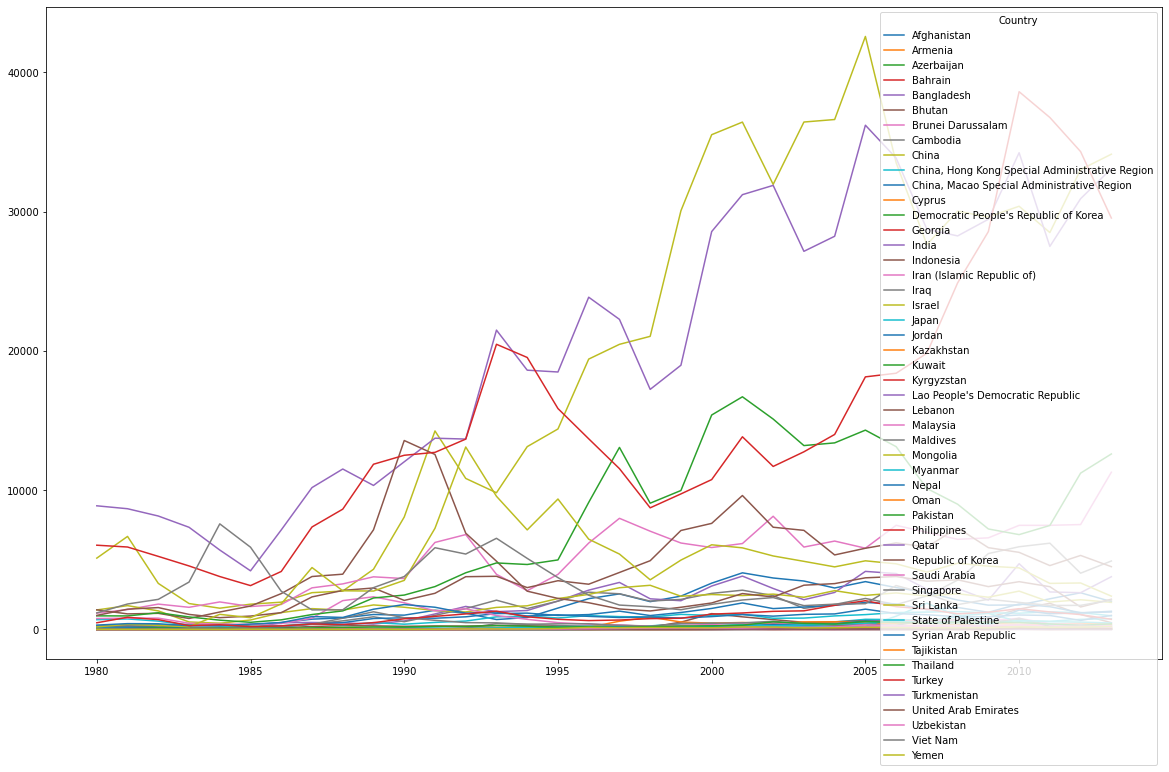

In [12]:
df[df['Continent'] == 'Asia'][years].T.plot(figsize=(20, 12))

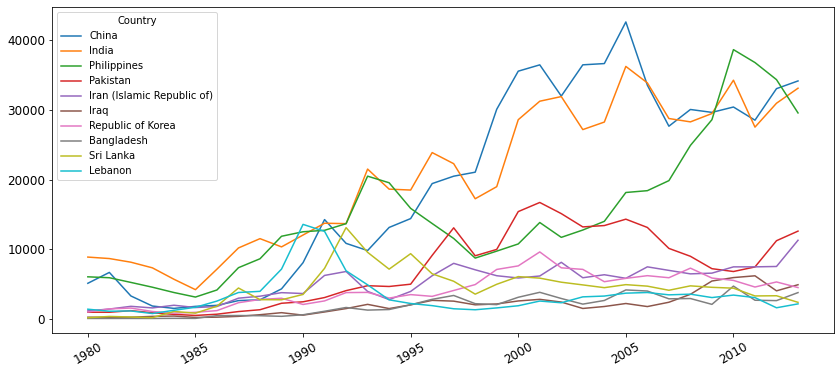

In [13]:
df[df['Continent'] == 'Asia'][years].sort_values(2013, ascending=False).head(10).T.plot(figsize=(14, 6))
plt.xticks(size=12, rotation=30)
plt.yticks(size=12)
plt.show()

<AxesSubplot:>

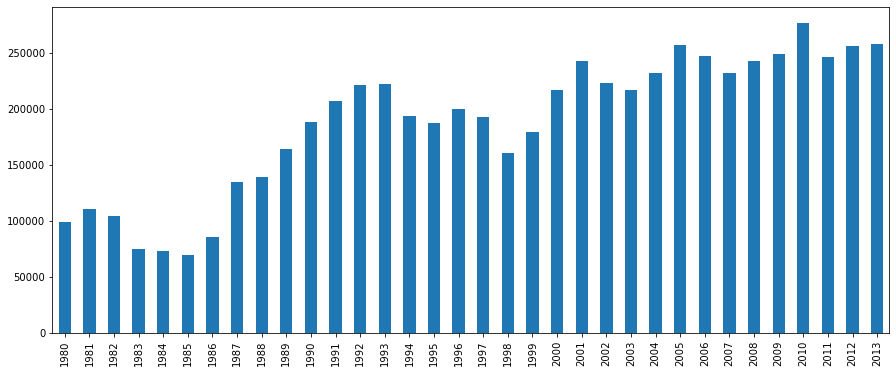

In [14]:
df[years].sum().plot(kind='bar', figsize=(15, 6))

In [15]:
df.Continent

Country
Afghanistan          Asia
Albania            Europe
Algeria            Africa
American Samoa    Oceania
Andorra            Europe
                   ...   
Viet Nam             Asia
Western Sahara     Africa
Yemen                Asia
Zambia             Africa
Zimbabwe           Africa
Name: Continent, Length: 195, dtype: object

In [19]:
df['total'] =  df.sum(axis=1)

In [28]:
continents = df.groupby('Continent').sum()['total']

<AxesSubplot:ylabel='total'>

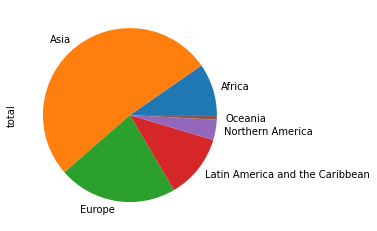

In [30]:
continents.plot(kind="pie")

In [39]:
names = continents.index

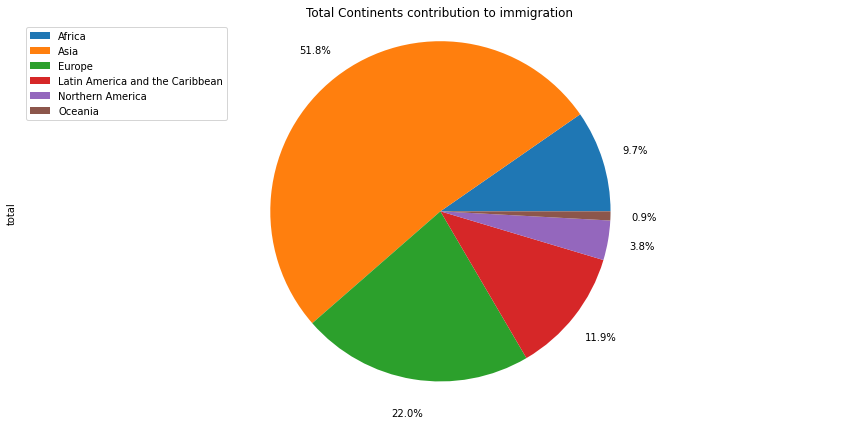

In [47]:
continents.plot(kind="pie", autopct="%1.1f%%", pctdistance=1.2, labels=None, figsize=(15, 7))
plt.title('Total Continents contribution to immigration')
plt.legend(names, loc="upper left")
plt.axis('equal')
plt.show()

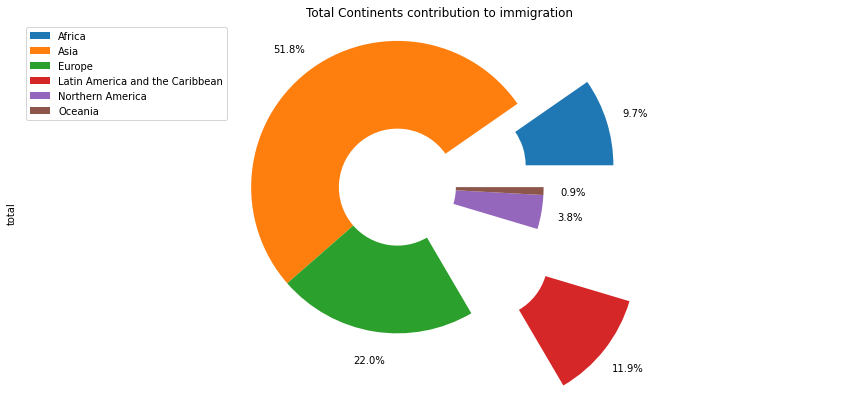

In [59]:
explode_v = [0.5, 0, 0, 0.8, 0, 0]
continents.plot(kind="pie", autopct="%1.1f%%", pctdistance=1.2, 
labels=None, figsize=(15, 7), explode = explode_v, wedgeprops={'width': 0.6})
plt.title('Total Continents contribution to immigration')
plt.legend(names, loc="upper left")
plt.axis('equal')
plt.show()